# 2.4.3. Использование обученных моделей RusVectōrēs.


Видеоуроки:  
2.4.1. Векторное представление единиц текста.  
2.4.2. Обучение нейросетевой модели word2vec.  
**2.4.3. Использование обученных моделей RusVectōrēs.**  
2.4.4. Нейросетевая модель torch.embedding.  

Дополнительные материалы:  
2.4.5. Использование обученных моделей RusVectōrēs для классификации (анализа тональности) текста.  
2.4.6. Использование моделей Hugging Face для классификации (анализа тональности) текста.  

## О проекте RusVectōrēs

Сервис [RusVectōrēs](https://rusvectores.org/ru/about/) вычисляет семантические отношения между словами русского языка и позволяет скачать предобученные дистрибутивно-семантические модели (word embeddings).  

> Обучение дистрибутивных моделей на основе больших корпусов может требовать существенных вычислительных мощностей. Поэтому важно предоставить русскоязычному лингвистическому сообществу доступ к предобученным моделям. Наш сервис дает пользователям готовые модели для скачивания (чтобы продолжить эксперименты на своём компьютере), а также удобный интерфейс запросов к ним. Также возможно визуализировать семантические отношения между словами, что, как мы надеемся, будет полезным для исследователей. В целом, задача нашего сервиса — снизить порог входа для тех, кто хочет работать в этом новом и интересном направлении.
  
Выбрав модель, вы можете:

1. вычислять семантическое сходство между парами слов;  
2. находить слова, ближайшие к данному (с возможностью фильтрации по части речи и частотности);  
3. решать аналогии вида «найти слово X, которое так относится к слову Y, как слово A относится к слову B»;  
4. выполнять над векторами слов алгебраические операции (сложение, вычитание, поиск центра лексического кластера и расстояний до этого центра).
5. рисовать семантические карты отношений между словами (это позволяет выявлять семантические кластеры или тестировать ваши гипотезы о таких кластерах);  
6. получать вектор (в виде массива чисел) и его визуализацию для данного слова в выбранной модели: для этого нужно кликнуть по любому слову или использовать уникальный адрес этого слова, как описано ниже;  
7. генерировать контекстно-зависимые лексические подстановки для контекстуализированных дистрибутивных моделей, например, ELMo;  
8. скачать модель.  
  
Видео - https://youtu.be/wWG204boB5s  

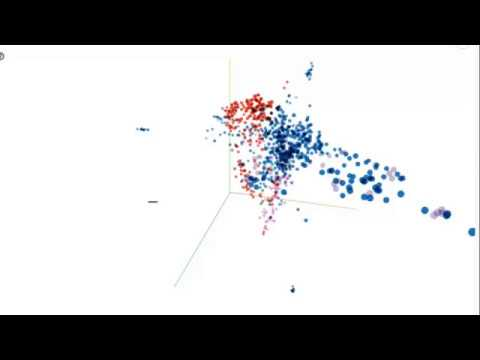

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('wWG204boB5s', width=560, height=320)

## Использование моделей RusVectōrēs.  
  
В основе RusVectores лежит библиотека [Gensim](https://radimrehurek.com/gensim/).  
Gensim - изначально библиотека для тематического моделирования текстов. Однако помимо различных алгоритмов для topic modeling в ней реализованы на python и алгоритмы word2vec (который в оригинале был написан на C++).  

In [11]:
from typing import List
import gensim, logging
import zipfile
import wget
import warnings

# Уберем лишние предупреждения
warnings.filterwarnings('ignore')
# Поскольку обучение и загрузка моделей могут занимать продолжительное время, иногда бывает полезно вести лог событий.
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Если у вас есть достаточно большой корпус текстов - вы можете натренировать модель самостоятельно на своих данных. Но для общих целей есть смысл использовать готовые модели, натренированные на больших объемах текстов как русского так и английского языков. 

Модели для русского скачать можно здесь - https://rusvectores.org/ru/models/

Существуют несколько форматов, в которых могут храниться модели - данные могут храниться в нативном формате word2vec, при этом модель может быть бинарной или не бинарной. Загрузка модели в формате word2vec в классе `KeyedVectors` (в котором хранится большинство относящихся к дистрибутивным моделям функций) осуществляется функцией `load_word2vec_format`, бинарность модели можно указать в аргументе `binary`. Помимо этого, модель можно хранить и в собственном формате gensim, для этого существует класс `Word2Vec` с функцией `load`.  

Сейчас авторы перешли на загрузку с использованием инфраструктуры Nordic Language Processing Laboratory. По клику на модель скачивается zip-архив с уникальным числовым идентификатором (например, `180.zip`). Внутри архива всегда находится файл `meta.json`, содержащий в структурированном и стандартном виде информацию о модели и корпусе, на котором она обучена. word2vec-модели лежат в архивах сразу в двух word2vec-форматах: бинарном `model.bin` (удобен для быстрой загрузки) и текстовом `model.txt` (удобен для просмотра человеком).  

### Word2Vec
Давайте скачаем модель Word2Vec для русского языка, созданную на основе [Национального Корпуса Русского Языка (НКРЯ)](http://www.ruscorpora.ru/), и загрузим в её в память. Распаковывать скачанный архив для обычных моделей не нужно, так как его содержимое прочитается при помощи специальной инструкции:

In [2]:
MODEL_W2V_URL = 'http://vectors.nlpl.eu/repository/11/180.zip'

# размер файла - 460 Mb.
# Закомментируйте строку, если скачивали файл модели ранее.
# m = wget.download(MODEL_W2V_URL)
model_file = MODEL_W2V_URL.split('/')[-1]

with zipfile.ZipFile(model_file, 'r') as archive:
    stream = archive.open('model.bin')
    model_w2v = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True)

2022-01-19 15:54:41,906 : INFO : loading projection weights from <zipfile.ZipExtFile name='model.bin' mode='r' compress_type=deflate>
2022-01-19 15:54:44,926 : INFO : loaded (189193, 300) matrix from <zipfile.ZipExtFile [closed]>


Проанализируем несколько слов.  
В этой модели для каждого слова указывается часть речи. Подробнее о тегах частей речи можно почитать тут - https://universaldependencies.org/u/pos/all.html  
`NOUN` - существительное,  
`ADJ` - прилагательное,  
`VERB` - глагол.  

In [42]:
words = ['день_NOUN', 'ночь_NOUN', 'человек_NOUN', 'семантика_NOUN', 'студент_NOUN', 'студент_ADJ']

Запросим у модели 5 ближайших соседей для каждого слова и коэффициент косинусной близости для каждого:

In [47]:
def print_neighbors(words: List[str], model: gensim.models.KeyedVectors, top_n: int = 5):
    """
    Печатаем семантически близкие слова.

    Args:
        words (List[str]): список слов, для которых нужно найти соседей.
        model (gensim.models.KeyedVectors): модель gensim.
        top_n (int): количество соседей. По умолчанию 5.
    """

    col_width = 20
    print(*[c.ljust(col_width) for c in ['Слово', 'Сосед', 'Коэффициент косинуссной близости']])
    print('-'*col_width*3)

    for word in words:
        # есть ли слово в модели? Может быть, и нет.
        if word in model:
            # выдаем top_n ближайших соседей слова:
            for i in model.most_similar(positive=[word], topn=top_n):
                w2 = i[0]
                d = round(i[1], 3)
                print(word.ljust(col_width), w2.ljust(col_width), d)
            print('')
        else:
            # Out of vocabulary
            print(word + ' - OOV! 😒')

In [48]:
print_neighbors(words, model_w2v, 5)

Слово                Сосед                Коэффициент косинуссной близости
------------------------------------------------------------
день_NOUN            неделя_NOUN          0.738
день_NOUN            день_PROPN           0.707
день_NOUN            месяц_NOUN           0.704
день_NOUN            час_NOUN             0.664
день_NOUN            утро_NOUN            0.653

ночь_NOUN            ночь_PROPN           0.831
ночь_NOUN            вечер_NOUN           0.718
ночь_NOUN            рассвет_NOUN         0.697
ночь_NOUN            ночи_NOUN            0.692
ночь_NOUN            полночь_NOUN         0.67

человек_NOUN         человек_PROPN        0.785
человек_NOUN         человеческий_ADJ     0.592
человек_NOUN         существо_NOUN        0.574
человек_NOUN         народ_NOUN           0.535
человек_NOUN         личность_NOUN        0.53

семантика_NOUN       семантический_ADJ    0.802
семантика_NOUN       синтаксический_ADJ   0.757
семантика_NOUN       модальный_ADJ        0.73


Word2Vec не может обрабатывать слова, которых нет в словаре.  
Давайте посмотрим, какие слова есть в словаре модели:  

In [17]:
model_w2v.index2word[:10]

['так_ADV',
 'быть_VERB',
 'мочь_VERB',
 'год_NOUN',
 'человек_NOUN',
 'xxxxxx_NUM',
 'сказать_VERB',
 'еще_ADV',
 'один_NUM',
 'говорить_VERB']

Косинусная близость пары слов.

In [18]:
print(model_w2v.similarity('человек_NOUN', 'обезьяна_NOUN'))

0.22025342


Найди лишнее слово.

In [19]:
print(model_w2v.doesnt_match('яблоко_NOUN груша_NOUN виноград_NOUN банан_NOUN лимон_NOUN картофель_NOUN'.split()))

картофель_NOUN


In [20]:
print(model_w2v.doesnt_match('сельдь_NOUN италия_NOUN германия_NOUN россия_NOUN'.split()))

2022-01-19 16:02:17,526 : WARNING : vectors for words {'германия_NOUN'} are not present in the model, ignoring these words


сельдь_NOUN


Борщ + Россия - Италия

In [21]:
print(model_w2v.most_similar(positive=['борщ_NOUN', 'россия_NOUN'], negative=['италия_NOUN'])[0][0])

суп_NOUN


In [22]:
print(model_w2v.most_similar(positive=['кофеин_NOUN', 'кофе_NOUN'], negative=['чай_NOUN'])[0][0])

антиоксидант_NOUN


## FastText.  
(FastText)[https://fasttext.cc] - библиотека для порведения различных операций с текстом. Нас интересует векторизация - в RusVectores можно скачать прдобученные модели в формате fasttext.  
В отличии от Word2vec, fasttext обучается не на словах целиком, а на побуквенных Н-граммах, что позволяет обрабатывать слова, которых не было в обучающем корпусе (отсутствуют в словаре модели). Так каждое слово представляется комбинацией н-грамм из которых оно состоит. И, естественно, нет необходимости учитывать часть речи слова.  
  
Мы не будем использовать оригинальную библиотеку `fasttext`, вместо этого так же используем `gensim`.  
Модели `fasttext` в новой версии `gensim` загружаются при помощи следующей команды:
```python
gensim.models.KeyedVectors.load("model.model")
```

Перед загрузкой скачанный архив с моделью fasttext необходимо распаковать. Определить необходимый для загрузки файл несложно, чаще всего это файл с расширением .model  
Найдем на странице с моделями модель fasttext, обученную так же на НКРЯ.  


In [9]:
MODEL_FT_URL = 'http://vectors.nlpl.eu/repository/20/181.zip'

model_arch_file = MODEL_FT_URL.split('/')[-1]
model_path = model_arch_file.split('.')[0]

In [21]:
# Скачивание модели.
# размер файла - 2,6 Gb. Не выполняйте этот код повторно, если модель уже скачана и распакована.

_ = wget.download(MODEL_FT_URL)
print(f'extract {model_arch_file} to path: {model_path}')
with zipfile.ZipFile(model_file, 'r') as archive:
    zipfile.ZipFile.extractall(archive, model_path)


extract 181.zip to path: 181


In [10]:
model_ft = gensim.models.KeyedVectors.load(f'{model_path}/model.model')

2022-01-19 15:55:54,701 : INFO : loading Word2VecKeyedVectors object from 181/model.model
2022-01-19 15:55:55,198 : INFO : loading vectors_vocab from 181/model.model.vectors_vocab.npy with mmap=None
2022-01-19 15:55:55,438 : INFO : loading vectors_ngrams from 181/model.model.vectors_ngrams.npy with mmap=None
2022-01-19 15:55:58,748 : INFO : loading vectors from 181/model.model.vectors.npy with mmap=None
2022-01-19 15:55:58,991 : INFO : setting ignored attribute vectors_vocab_norm to None
2022-01-19 15:55:58,993 : INFO : setting ignored attribute buckets_word to None
2022-01-19 15:55:58,993 : INFO : setting ignored attribute vectors_norm to None
2022-01-19 15:55:58,994 : INFO : setting ignored attribute vectors_ngrams_norm to None
2022-01-19 15:55:58,995 : INFO : loaded 181/model.model


In [49]:
words = 'день ночь человек семантика студент'.split(' ')
print_neighbors(words, model_ft, 5)

Слово                Сосед                Коэффициент косинуссной близости
------------------------------------------------------------
день                 неделя               0.658
день                 днями                0.632
день                 месяца               0.63
день                 месяц                0.627
день                 утро                 0.624

ночь                 ночью                0.859
ночь                 ..ночь               0.784
ночь                 ночи                 0.775
ночь                 ..вечер              0.714
ночь                 вечер                0.714

человек              человека             0.81
человек              человек-с            0.773
человек              человек-то           0.753
человек              человеко             0.71
человек              ..человек            0.708

семантика            семантико            0.929
семантика            семантический        0.873
семантика            семантическить       0.865


FastText обрабатывает слова как набор н-грамм. Давайте посмотрим, что будет с несуществующими словами:

In [50]:
words = 'вокралось хливкие шорьки пырялись по наве и хрюкатали зелюки как мюмзики в мове'.split(' ')
print_neighbors(words, model_ft, 2)

Слово                Сосед                Коэффициент косинуссной близости
------------------------------------------------------------
вокралось            краля                0.602
вокралось            казалось             0.589

хливкие              сливки               0.729
хливкие              наливки              0.684

шорьки               горе-горький         0.624
шорьки               горький              0.62

пырялись             пыр-пыр              0.746
пырялись             пырять               0.732

по                   тпо                  0.516
по                   ..по                 0.44

наве                 нав                  0.737
наве                 навь                 0.665

и                    -брат                0.234
и                    -младший             0.231

хрюкатали            хрюк                 0.732
хрюкатали            хрюкать              0.696

зелюки               зел                  0.679
зелюки               зелика               

И с этой моделью так же доступны различные операции.

In [51]:
print(model_ft.similarity('человек', 'обезьяна'))

0.38349736


In [54]:
print(model_ft.doesnt_match('яблоко груша виноград банан лимон картофель'.split()))
print(model_ft.doesnt_match('италия германия россия сельдь'.split()))

картофель
сельдь


In [53]:
print(model_ft.most_similar(positive=['борщ', 'россия'], negative=['италия'])[0][0])
print(model_ft.most_similar(positive=['кофеин', 'кофе'], negative=['чай'])[0][0])

суп
пепсин


## Инструменты на сайте RusVectōrēs.  
На сайте проекта [RusVectōrēs](https://rusvectores.org) доступны различные инструменты, позволяющие проводиь эксперименты с моделями без использования программного кода.  

![alt text](https://pbs.twimg.com/media/FGRfHJMWQAQVj2i.jpg)


# Выводы 

1. Сервис RusVectōrēs предоставляет доступ к большому количеству предобученных моделей.  
2. Модели RusVectores позволяют решать несколько задач:  
        - вычислять семантическое сходство между парами слов;  
        - находить слова, ближайшие к данному;  
        - решать аналогии вида «найти слово X, которое так относится к слову Y, как слово A относится к слову B»;  
        - и прочее.  
3. Использование готовой модели, обученной на большом тексте, дает много плюсов для использования в своих проектах (примеры будут рассмотрены в следующих темах).  
4. Много инструментов для экспериментов доступны на сайте проекта.  

# Дополнительные материалы:  
  
https://rusvectores.org  
https://radimrehurek.com/gensim  
https://fasttext.cc  
